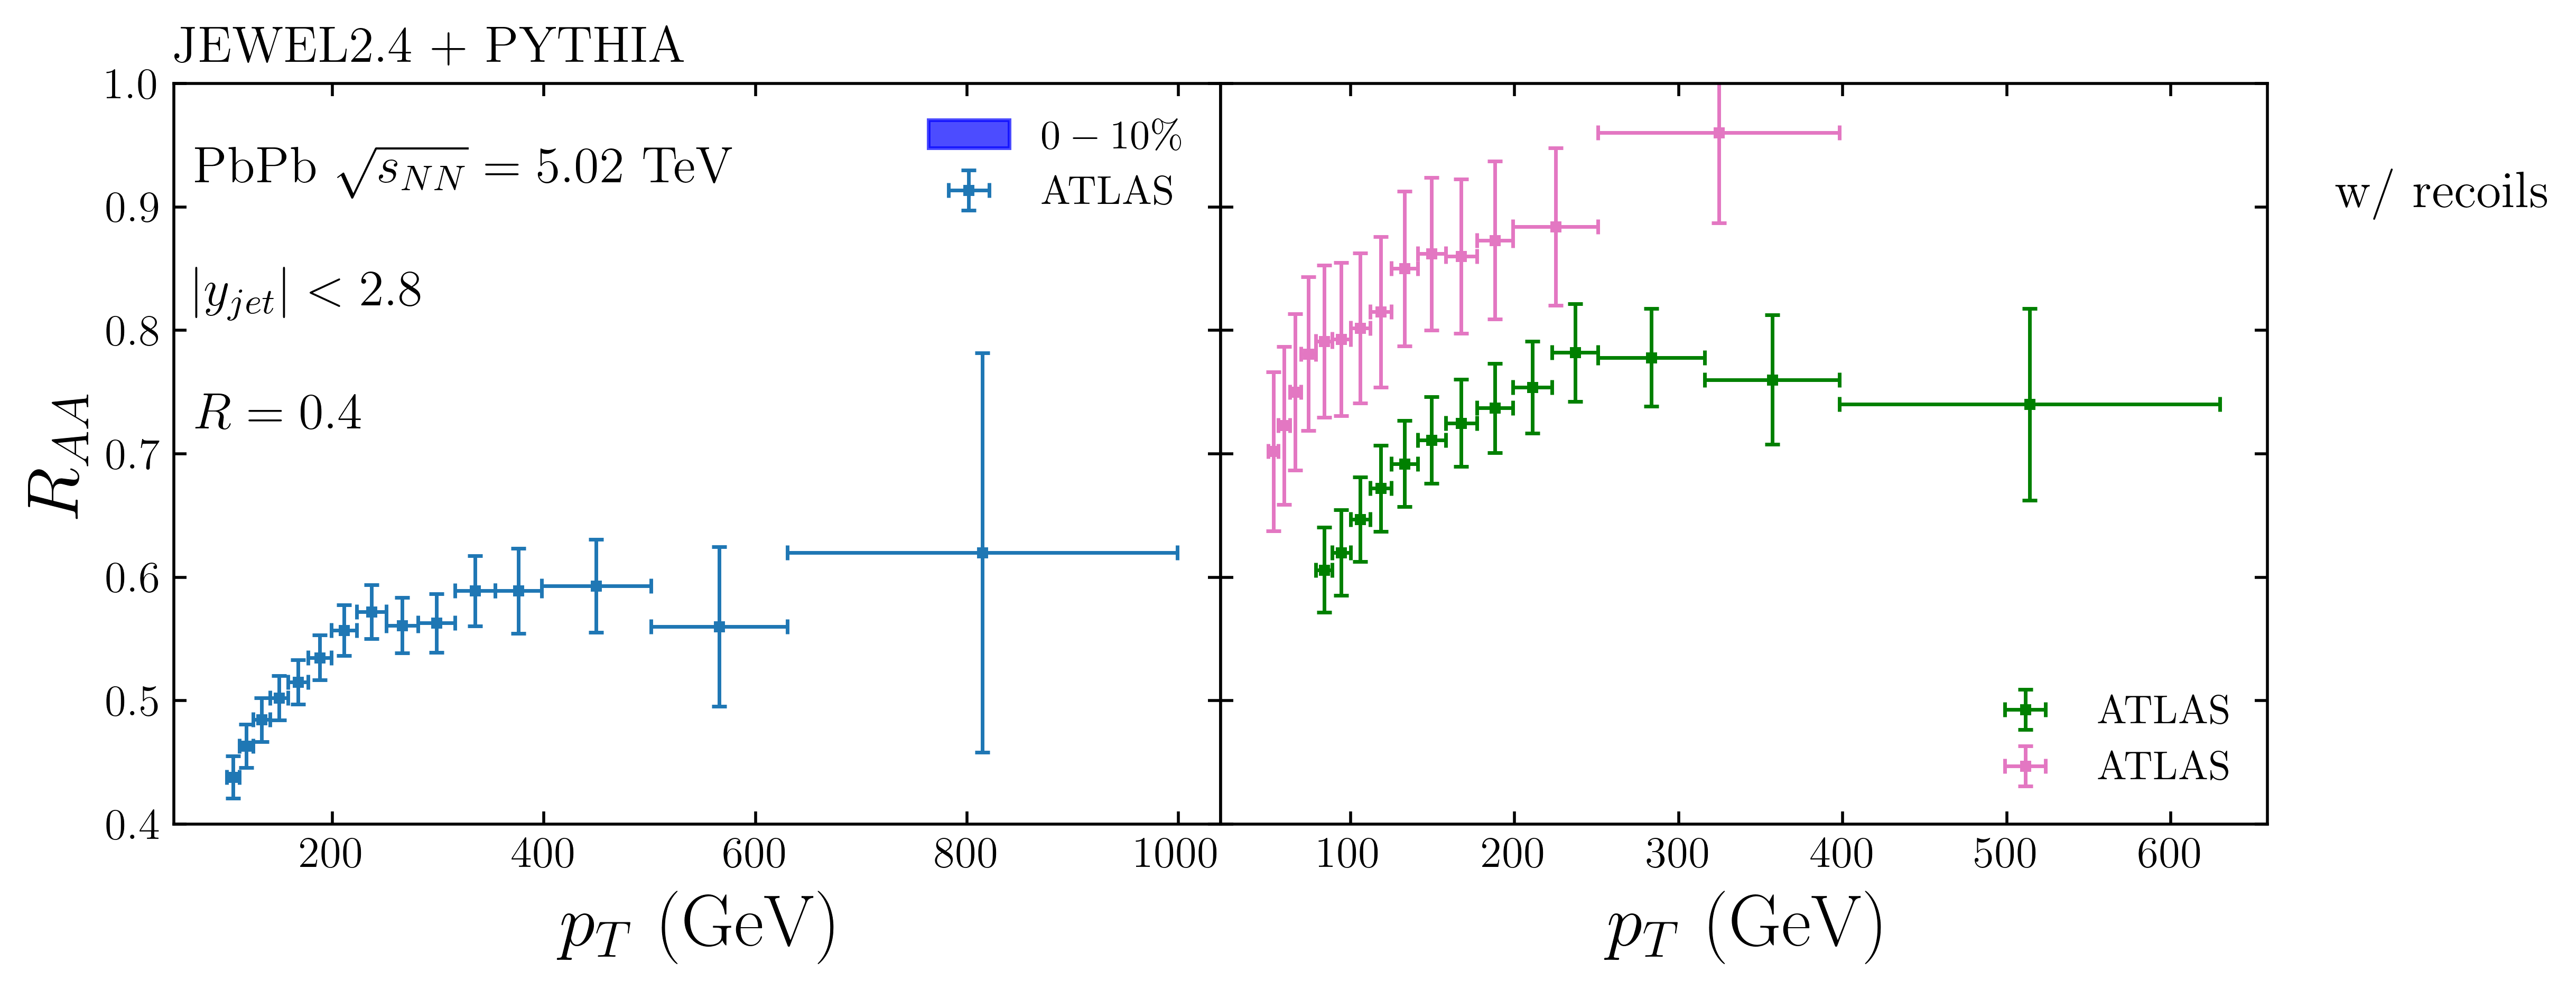

In [1]:
#RAA DEFAULT Jewel2.4
import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os



#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]






plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`


yodapp = [] 
yodaPbPb = []
obs = []
obspp = []




            





#R = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4
#CENTS = ['0-10','10-20','30-40','50-60']
CENTS = ['0-10']


fig, (axs1, axs2) = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=True,
                                       gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (10,4), dpi = 500)



for i in range(len(CENTS)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vacuum/ppv240-5TeV_raa_R'+str(R)+'.yoda')
    #yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/simple/simple_Pb_502_'+str(CENTS[i])+'_reon_raa_R'+str(R)+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/simple/simple_2604_jewel2.4_Pb_276_reoff_raa_R0.4.yoda')
    
    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R))
    obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    
    
    
    
    
  
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    
    pp_jet = histos_pp[0][obspp[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]
    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)    
                    
          
    raa = PbPb_jet / pp_jet
    
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)                

    arr = [x, y, yerr, xerr]
    
    
    
    
    minpt = 0


    if (CENTS[i] == '0-10'):        

        for k in range(minpt, arr[0].size):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='b', label='$0-10\%$')

            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='b')
            
            
        axs1.plot(arr[0], arr[1], alpha=0.1, color='b', linestyle='--')
        #axs1.legend(loc=1)
    
    if (CENTS[i] == '10-20'):
        for k in range(minpt, arr[0].size):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='tab:orange', label='$10-20\%$')
            
            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='tab:orange')
            
        axs1.plot(arr[0], arr[1], alpha=0.1, color='tab:orange', linestyle='--')
        #axs1.legend(loc=1)
            
    if (CENTS[i] == '30-40'):
        for k in range(minpt, arr[0].size):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='g', label='$30-40\%$')
            
            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='g')
            
        axs2.plot(arr[0], arr[1], alpha=0.1, color='g', linestyle='--')
        #axs2.legend(loc=1)
     
    if (CENTS[i] == '50-60'):
        for k in range(minpt, arr[0].size):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='tab:pink', label='$50-60\%$')

            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='tab:pink')
            
        axs2.plot(arr[0], arr[1], alpha=0.1, color='tab:pink', linestyle='--')
        #axs2.legend(loc=1)
            
  




     
            
#Plot dos dados experimentais            
ATLAS1 = DataFromExperiment('Data/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')
ATLAS12 = DataFromExperiment('Data/ATLAS_10-20_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d20-x01-y01')
ATLAS34 = DataFromExperiment('Data/ATLAS_30-40_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d22-x01-y01')
ATLAS56 = DataFromExperiment('Data/ATLAS_50-60_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d24-x01-y01')


axs1.errorbar(*ATLAS1, color='tab:blue', fmt='s', ms=2, elinewidth = 1., capsize = 2, capthick = 1, label='ATLAS')       
#axs1.errorbar(*ATLAS12, color='tab:orange', fmt='s', ms=2, elinewidth = 1., capsize = 2, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS34, color='g', fmt='s', ms=2, elinewidth = 1., capsize = 2, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS56, color='tab:pink', fmt='s', ms=2, elinewidth = 1., capsize = 2, capthick = 1, label='ATLAS')       
    
    


axs1.set_xlabel('$p_{T}$ (GeV)')
axs1.set_ylabel('$R_{AA}$')
axs2.set_xlabel('$p_{T}$ (GeV)')


axs1.legend(loc=1)
#plt.title('Jewel + PYTHIA $T_R ENTRO$ + vUSPhydro')
axs2.legend(loc=4)
plt.sca(axs1)
plt.title('JEWEL2.4 + PYTHIA', loc='left', fontsize = 14)
#plt.title('JEWEL + PYTHIA $T_R ENTRO$ + vUSPhydro', loc='left', fontsize = 14)
axs1.text(70., 0.92,'PbPb $\sqrt{s_{NN}} = 5.02$ TeV', fontsize = 14)
axs1.text(70., 0.82,'$|y_{jet}|<2.8$', fontsize = 14)
axs1.text(70., 0.72,'$R = 0.4$', fontsize = 14)
axs2.text(700., 0.9,'w/ recoils', fontsize = 14)


#plt.legend(loc=1)
plt.xlim(50., 1040.)
plt.ylim(4E-1, 1.)



# Save
plt.savefig('./Figures/2.76TeV/simple_reon_raa_jewel2.4_cents_R0.4.pdf')
plt.savefig('./Figures/2.76TeV/simple_reon_raa_jewel2.4_cents_R0.4.png')



#Mostrar gráfico
plt.show()